# Hessain

### Import library and setup dependency

#### Universal library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3 decimal places, no scientific notation
np.set_printoptions(precision=3, suppress=True)

#### Customize library

In [3]:
import os
import sys

# Set project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ''))
sys.path.append(project_root)

print(f"current: {os.getcwd()}")
print(f"root   : {project_root}")

current: c:\Users\BTCOM\Desktop\0_Project\DeepLearning\hessian-optimizer-comparison
root   : c:\Users\BTCOM\Desktop\0_Project\DeepLearning\hessian-optimizer-comparison


In [4]:
from custom_library.utils import dataUtils
import custom_library.models as my_models

# Set autoreload for external modules change
%load_ext autoreload 
%autoreload 2

### Explicit GD

#### Setup LR models class

In [5]:
model = my_models.ExplicitLrModel()

In [6]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

In [7]:
model.total_params()

2161

#### Load dataset

In [8]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = dataUtils.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


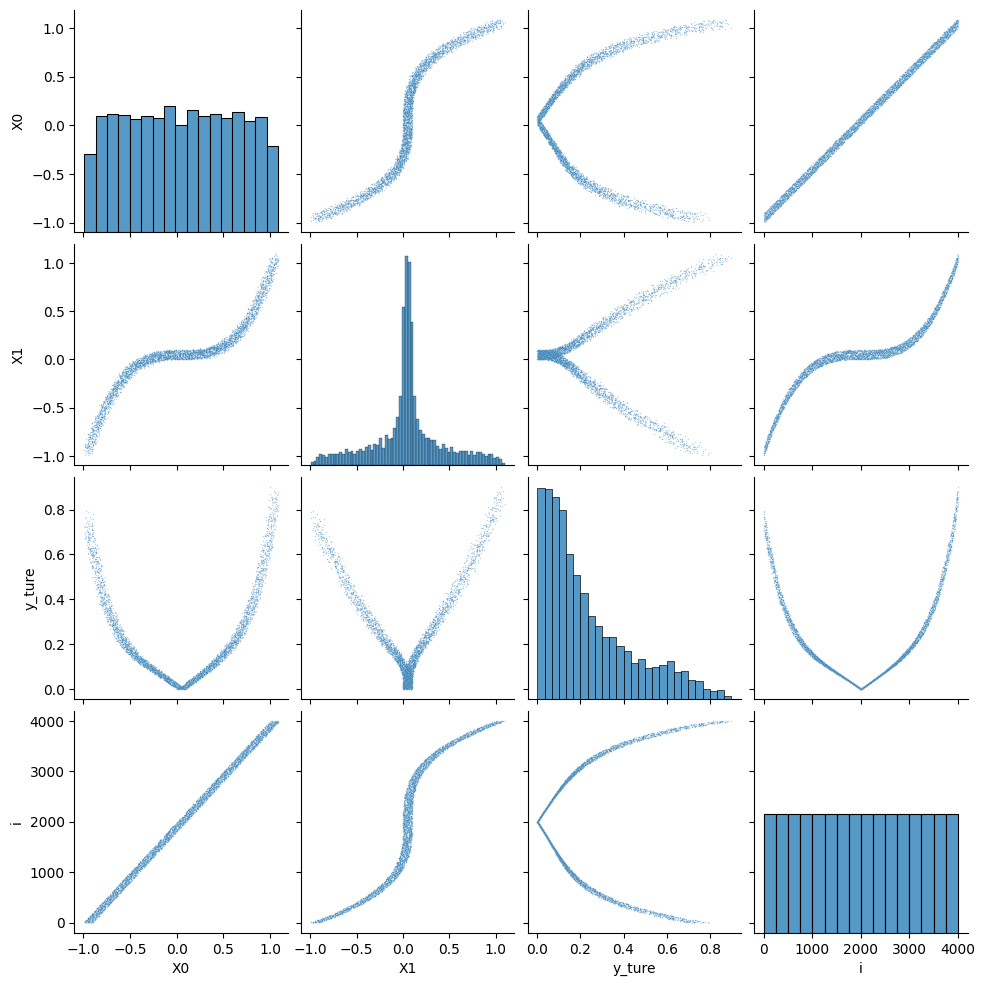

In [9]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

#### Train Model

In [11]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=200, batch_size=8, learning_rate=0.001)

Epoch 1/200 [=........................]
loss: 0.0496, val_loss: 0.0535

Epoch 2/200 [=........................]
loss: 0.0354, val_loss: 0.0366

Epoch 3/200 [=........................]
loss: 0.0316, val_loss: 0.0326

Epoch 4/200 [=........................]
loss: 0.0291, val_loss: 0.0299

Epoch 5/200 [=........................]
loss: 0.0271, val_loss: 0.0280

Epoch 6/200 [=........................]
loss: 0.0254, val_loss: 0.0265

Epoch 7/200 [=........................]
loss: 0.0242, val_loss: 0.0253

Epoch 8/200 [=........................]
loss: 0.0232, val_loss: 0.0244

Epoch 9/200 [==.......................]
loss: 0.0224, val_loss: 0.0236

Epoch 10/200 [==.......................]
loss: 0.0217, val_loss: 0.0231

Epoch 11/200 [==.......................]
loss: 0.0212, val_loss: 0.0226

Epoch 12/200 [==.......................]
loss: 0.0207, val_loss: 0.0221

Epoch 13/200 [==.......................]
loss: 0.0203, val_loss: 0.0217

Epoch 14/200 [==.......................]
loss: 0.0199, val_l

#### Evaluate Model

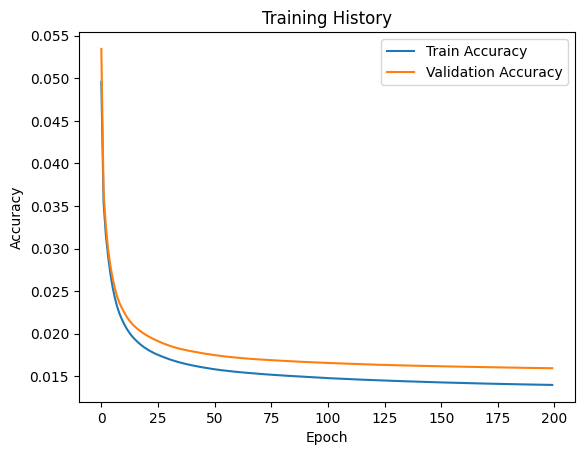

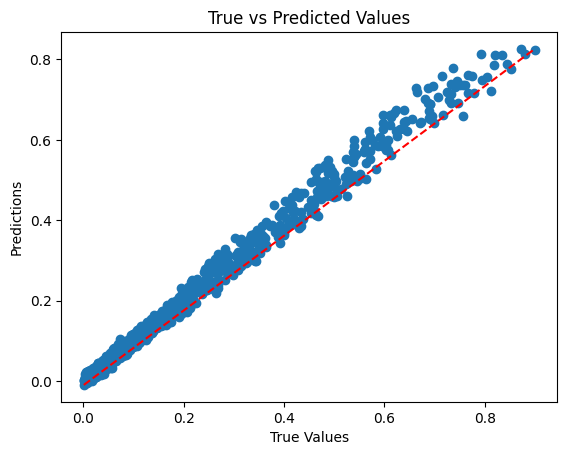

In [12]:
history.evaluate()

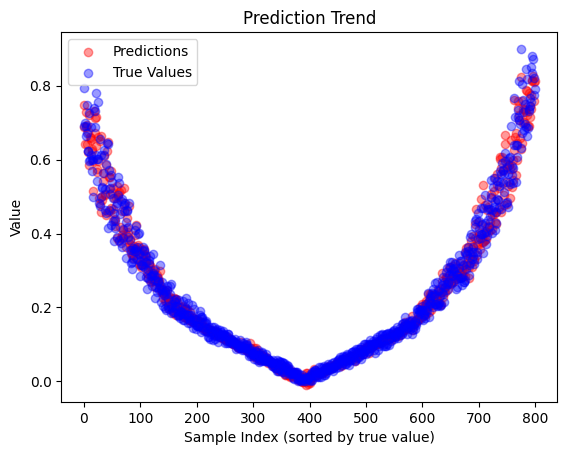

In [13]:
history.display_trend(ref="x", axis=0)

### Newton's GD

#### Setup LR models class

In [40]:
model = my_models.NewtonLrModel()

In [41]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

In [42]:
model.total_params()

2161

#### Load dataset

In [43]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = dataUtils.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


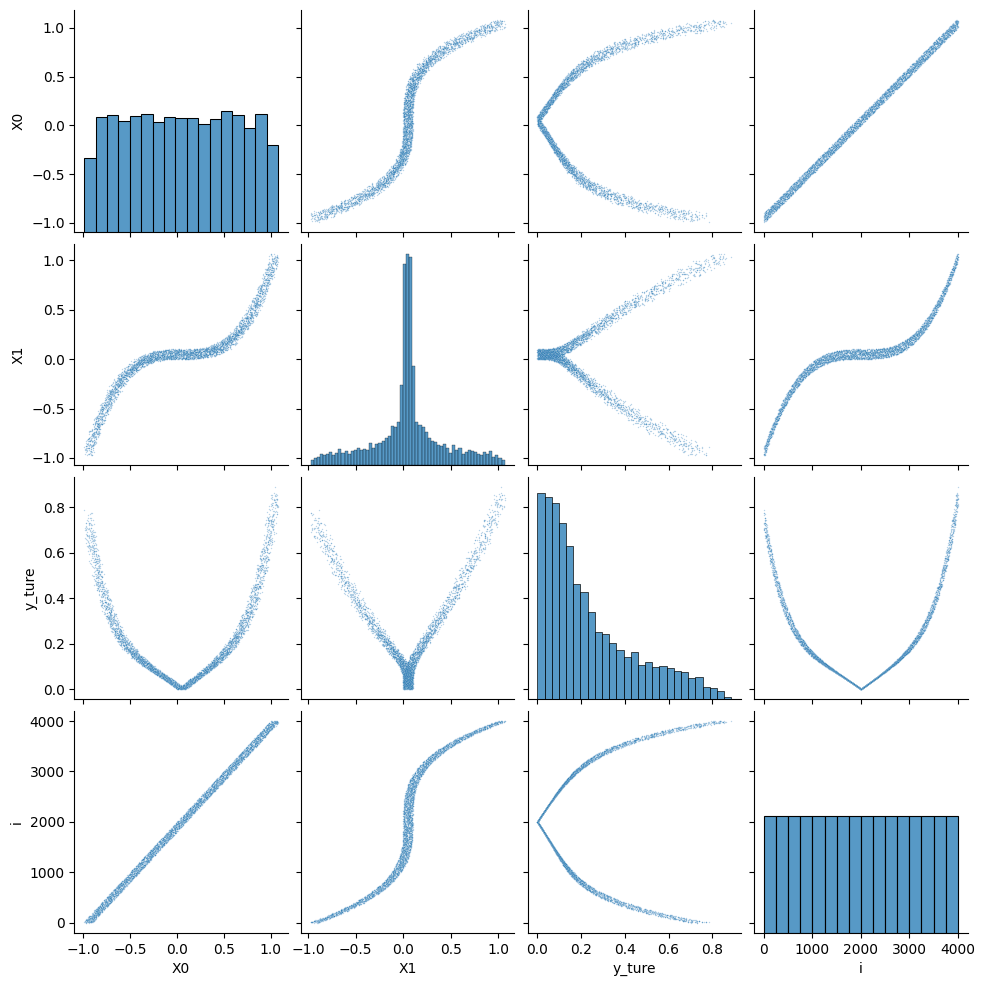

In [44]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

#### Train Model

In [ ]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=1, batch_size=512)

Epoch 1/200 [=........................]
loss: nan, val_loss: nan



KeyboardInterrupt: 

#### Evaluate Model

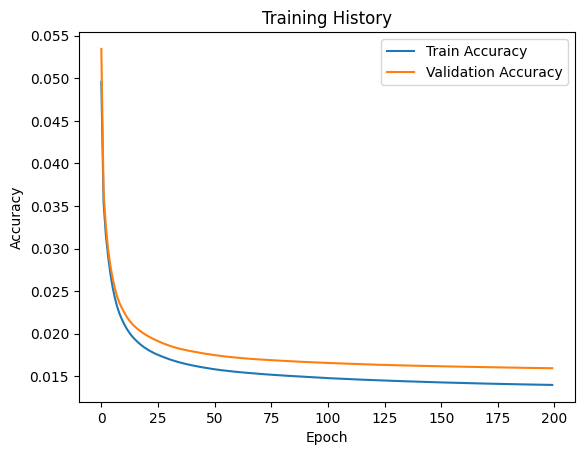

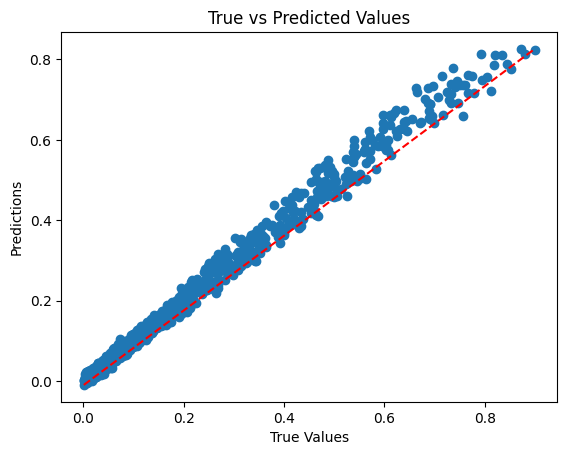

In [ ]:
history.evaluate()

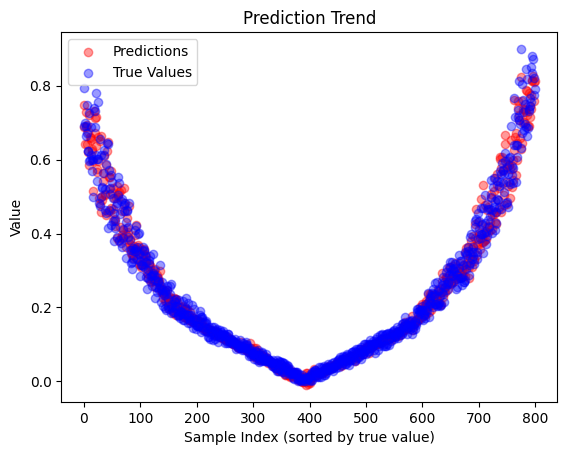

In [ ]:
history.display_trend(ref="x", axis=0)